### CS3で内容既出のためCSきむカンペより引用
### 既出内容以降は別のipynb「説明変数選択」に記載

# ライブラリimport
##### import numpy as np
##### import pandas as pd
##### import matplotlib.pyplot as plt
##### import seaborn as sns
##### import statsmodels.api as sm
##### from sklearn.preprocessing import scale
##### from sklearn.metrics import mean_ squared_error

# csv読み込み
##### csv_in = '@@@.csv'
##### df = pd.read_csv(csv_in, sep=',', skiprows=0, header=0)
##### print(df.shape)
##### print(df.info())
##### display(df.head())

# 目的変数と説明変数を分ける
### 例
###### XにWeight列を説明変数として代入
###### yにHomeRun列を目的変数として代入
##### X = df[['Weight']]
##### y = df['HomeRun']

# カテゴリー変数の数値化
### 大小関係のあるカテゴリー変数の数値化
##### X['studytime'] = X['studytime'].replace({'<2 hours':1, '2 to 5 hours':2, '5 to 10 hours':3, '>10 hours':4})
### 大小関係のないカテゴリー変数をダミー変数化
##### 変数 = pd.get_dummies(ダミー変数化前の変数,drop_first=True)
###### drop_first=Trueとすると、アルファベット順で先頭の値は、対応するダミー変数が作成されず、「全ダミー変数の値が0」が対応することになる

# 標準化なしで線形重回帰分析
##### X_dumm_c = sm.add_constant(X_dumm)
##### model = sm.OLS(y, X_dumm_c)
##### results = model.fit()
##### print(results.summary())
###### --------------------------------------------------
##### ##### print('R2:', results.rsquared)
###### 決定係数の表示
##### print('Adj2 R2:', results.rsquared_adj)
###### 自由度調整済み決定係数の表示
##### print(result.params)
###### 偏回帰係数

# 標準化ありの線形重回帰分析
##### X_scaled_ar = scale(X_dumm)
##### y_scaled_ar = scale(y)
##### X_scaled = pd.DataFrame(X_scaled_ar, columns=X_dumm.columns)
##### y_scaled = pd.Series(y_scaled_ar, name=y.name)
##### model = sm.OLS(y_scaled, X_scaled)
##### results_scaled = model.fit()
##### print(results_scaled.summary())
###### ------------------------------------------------------
###### 説明変数と目的変数を標準化
###### 標準化後のndarray(X_scaled_ar,y_scaled_ar)を、標準化前のDataFrame,SeriesであるX_dumm,yの情報を使って、DataFrame,Seriesに戻す(X_scaled,y_scaled)
###### 全変数について平均が0なので、回帰式の定数項は必ず0になることから、add_constant()は不要(あっても大丈夫)

# 標準化偏回帰係数を絶対値が大きい順にソート
##### print(result_scaled.params.sort_values(key=np.abs,ascending=False))
###### key=関数名オプションをつけるとソート対象の各値に関数を適用してから、その戻り値に対してソートが行われるようになる

# 与えられたモデルを用いて予測
##### X_test = pd.DataFrame([[18, 4, 0, 0, 1, 1, 2, 0, 0, 0, 1],[15, 1, 3, 1, 0, 4, 3, 10, 0, 1, 0],],columns=X_dumm.columns)  
##### print('X for prediction:')
##### display(X_test)
##### X_test_c = sm.add_constant(X_test, has_constant='add')
##### y_test = results.predict(X_test_c)
##### print('Predicted y:')
##### print(y_test)
###### -----------------------------------------------------
###### 2人の学生に対する予測成績の値を1度に求めた
###### 結果.predict(説明変数)で、与えた説明変数をモデルに入力したときの目的変数の予測値を取得できる

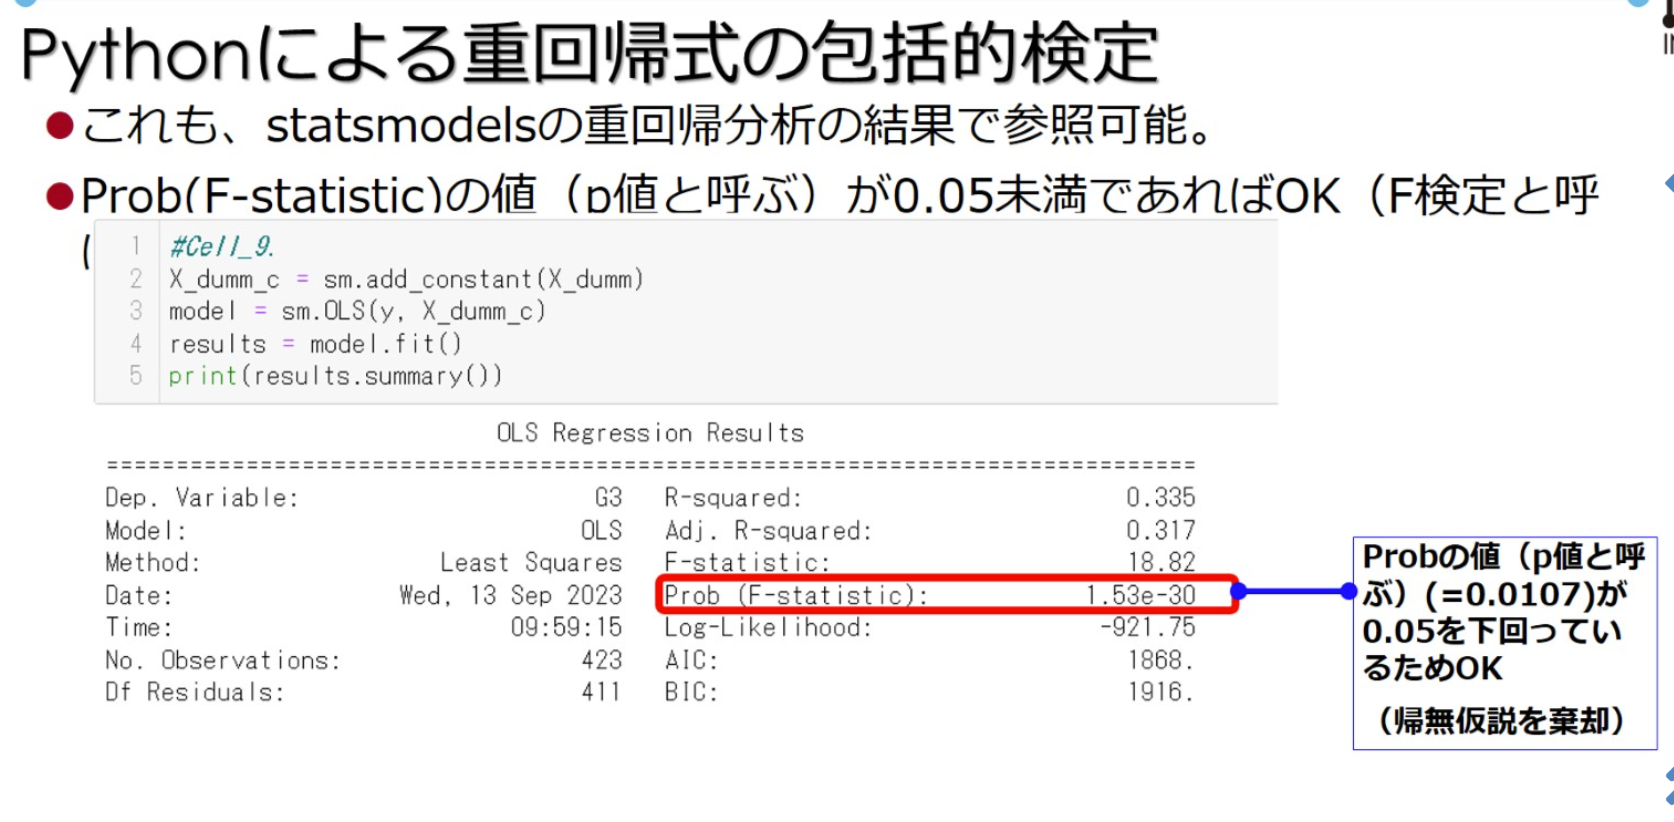
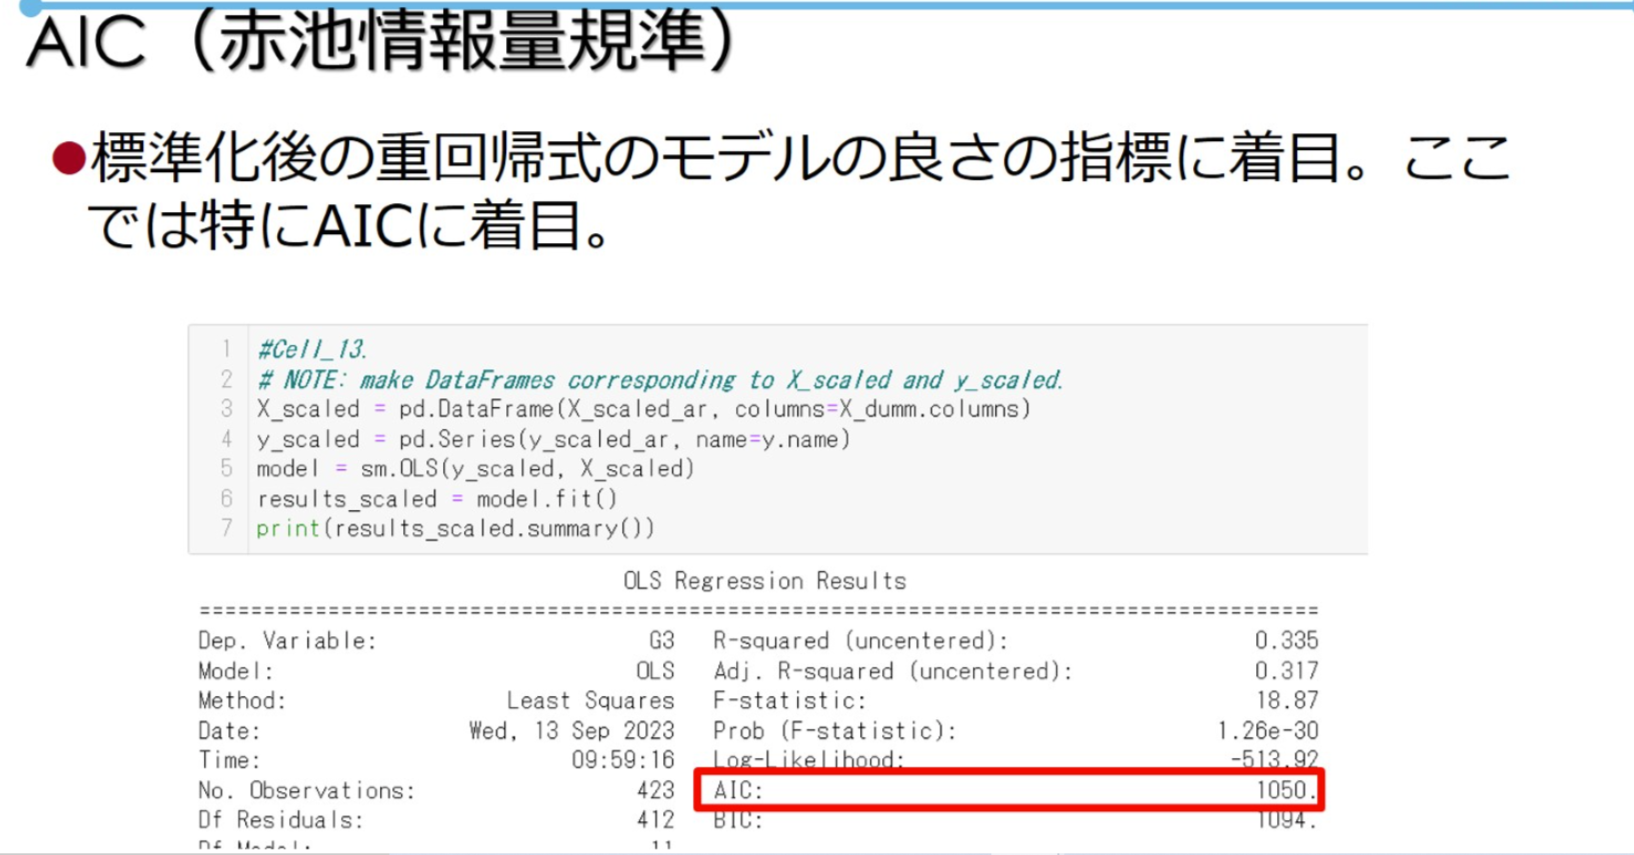
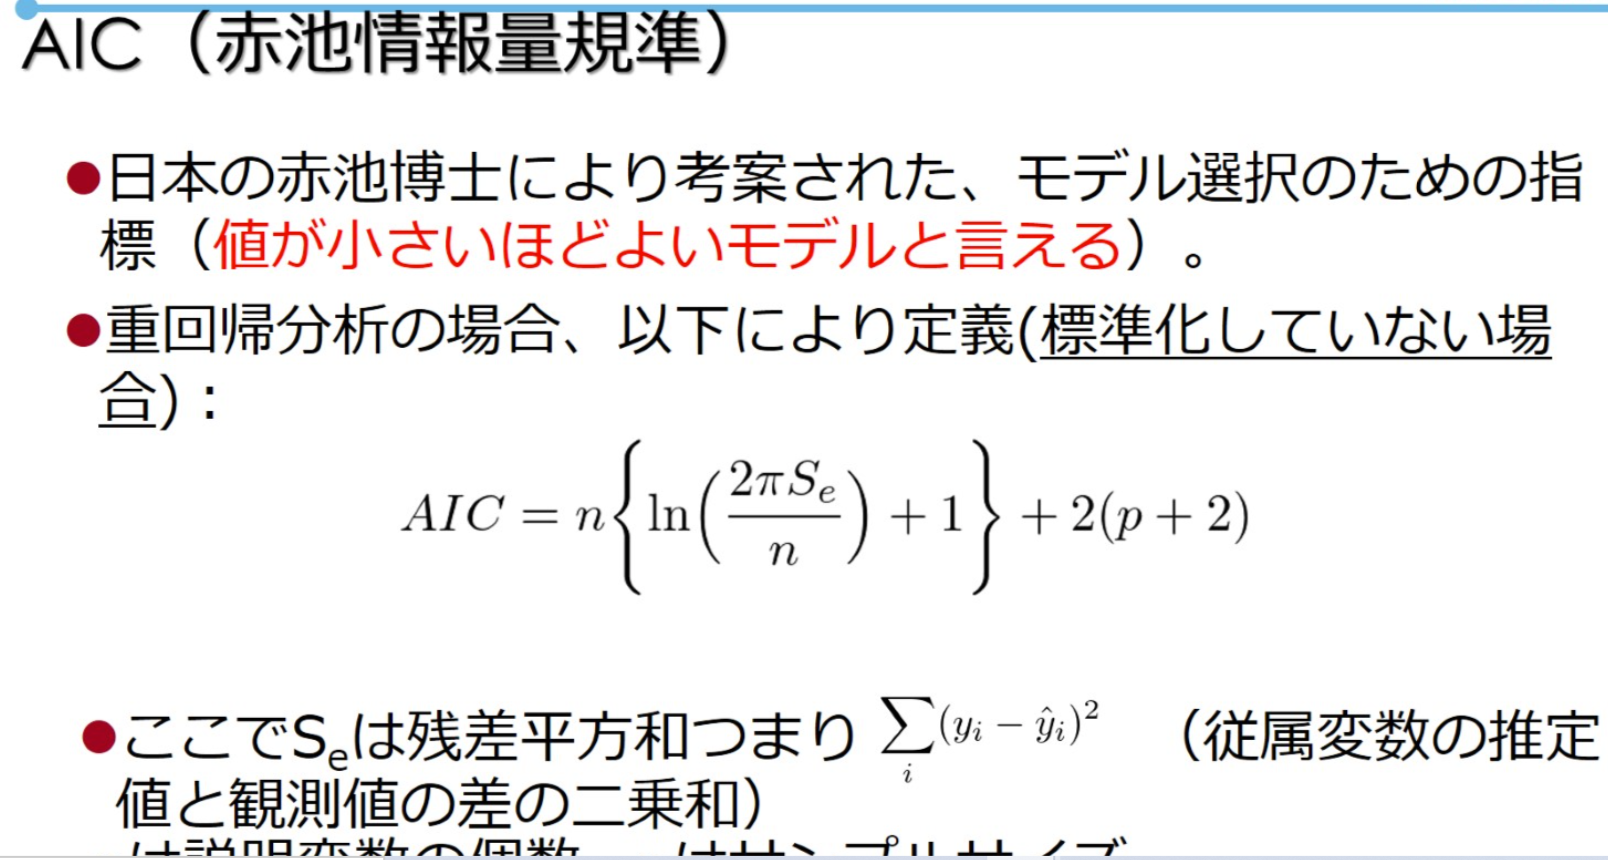